In [155]:
import numpy as np
import pandas as pd
from google.colab import files
import plotly.express as px
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.tree import DecisionTreeClassifier


In [128]:
upload=files.upload()

Saving Fraud_check (1).csv to Fraud_check (1) (3).csv


In [129]:
data=pd.read_csv('Fraud_check (1).csv')
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


0-->taxable_income <= 30000

1--> taxable_income > 30000


In [130]:
data['Taxable.Income']=data['Taxable.Income'].apply(lambda x:0 if x<=30000 else 1)

In [131]:
data['Taxable.Income'].value_counts()


1    476
0    124
Name: Taxable.Income, dtype: int64

In [132]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,1,39492,7,YES
596,YES,Divorced,1,55369,2,YES
597,NO,Divorced,1,154058,0,YES
598,YES,Married,1,180083,17,NO


<Axes: xlabel='Taxable.Income', ylabel='count'>

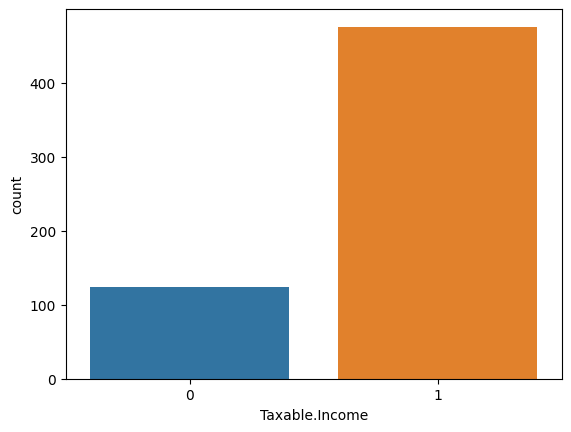

In [133]:
sns.countplot(x=data['Taxable.Income'])

In [134]:
fig=px.histogram(data,x='Undergrad',y='Taxable.Income',color='Taxable.Income',barmode='group',text_auto=True)
fig.show()

In [135]:
fig=px.histogram(data,x='Marital.Status',y='Taxable.Income',color='Taxable.Income',text_auto=True)
fig.show()

In [136]:
fig=px.histogram(data,x='City.Population',y='Taxable.Income',color='Taxable.Income',text_auto=True,barmode='group')
fig.show()

<ipython-input-137-8dfc6e0339e8>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='City.Population', ylabel='Density'>

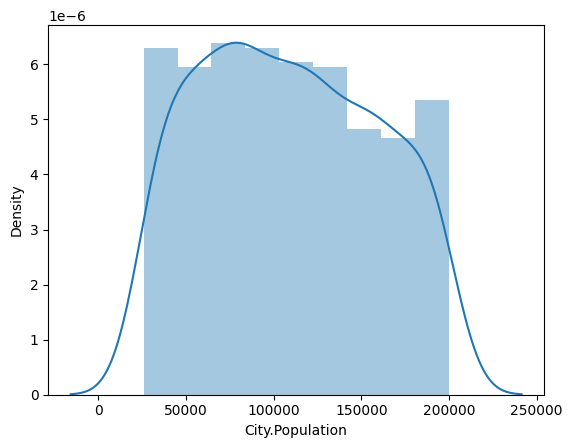

In [137]:
sns.distplot(data['City.Population'])

In [138]:
fig=px.histogram(data,x='Work.Experience',y='Taxable.Income',color='Taxable.Income',text_auto=True,barmode='group')
fig.show()

<ipython-input-139-4803e7a32c4b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Work.Experience', ylabel='Density'>

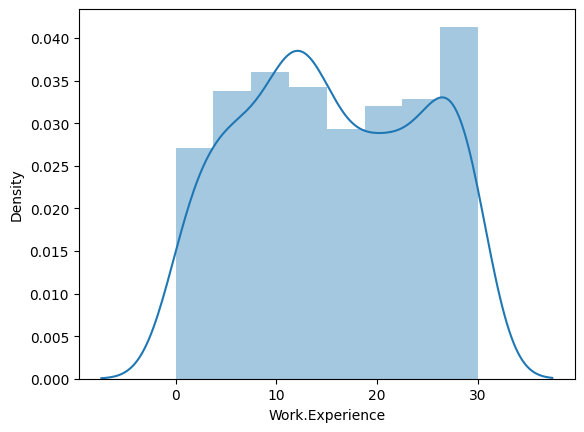

In [139]:
sns.distplot(data['Work.Experience'])

In [140]:
data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [141]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
columns=['Undergrad', 'Marital.Status', 'Taxable.Income','Urban']
for i in columns:
  data[i]=le.fit_transform(data[i])
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [142]:
x=data.drop('Taxable.Income',axis=1)
y=data['Taxable.Income']

In [143]:
kfold=KFold(n_splits=10)
cart=DecisionTreeClassifier()
model=BaggingClassifier(base_estimator=cart,n_estimators=100)
result_bc=cross_val_score(model,x,y,cv=kfold)
result_bc=result_bc.mean()
result_bc

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estim

0.7316666666666667

In [144]:
max_features=[1,2,3,4,5,6]
for i in max_features:
  kfold=KFold(n_splits=10)
  model=RandomForestClassifier(n_estimators=100,max_features=i,random_state=2000)
  results_f=cross_val_score(model,x,y,cv=kfold)
  print(f'{i} :{results_f.mean()}')


1 :0.7233333333333334
2 :0.7449999999999999
3 :0.735
4 :0.7383333333333333
5 :0.7383333333333333
6 :0.7383333333333333


In [145]:
kfold=KFold(n_splits=10)
model=RandomForestClassifier(n_estimators=100,max_features=2,random_state=2000)
results_rf=cross_val_score(model,x,y,cv=kfold)
print(results_rf)

[0.76666667 0.76666667 0.66666667 0.65       0.78333333 0.65
 0.85       0.68333333 0.76666667 0.86666667]


In [150]:
results_rf=results_rf.mean()
results_rf

0.7449999999999999

In [147]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
kfold=KFold(n_splits=10)
estimators=[]
model1=LogisticRegression(max_iter=500)
estimators.append(('model1',model1))
model2=SVC()
estimators.append(('model2',model2))
model4=DecisionTreeClassifier()
estimators.append(('model4',model4))
ensemble=VotingClassifier(estimators)
results=cross_val_score(ensemble,x,y,cv=kfold)
results=results.mean()

In [154]:
import plotly.express as px
x=['mean of models','BaggingClassifier','RandomForestClassifier']
y=[results,result_bc,results_rf]
fig=px.histogram(x=x,y=y,text_auto=True,title='models vs models mean',labels={'x':'models','y':'models mean'})
fig.show()
